In [128]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def prepare_data(features, target):
    train = pd.read_csv('train.csv')
    test = pd.read_csv('test.csv')

    ohe = OneHotEncoder()
    X_train = train[features]
    y_train = train[target]
    X_test = test[features]

    X_total = pd.concat([X_train, X_test])
    X_total_ohe = ohe.fit_transform(X_total)
    n_train = X_train.shape[0]
    X_train_ohe = X_total_ohe[:n_train,]
    X_test_ohe = X_total_ohe[n_train:,]

    return X_train_ohe, y_train, X_test_ohe

In [2]:
def make_submission_file(y_test_pred, filename=None):
    submit_data = pd.DataFrame(columns=['ID', 'ACTION'])
    submit_data['ID'] = xrange(1, len(y_test_pred)+1)
    submit_data['ACTION'] = y_test_pred
    if not filename:
        filename = 'submit.csv'
    submit_data.to_csv(filename, index=False)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC

clf_rf = RandomForestClassifier()
clf_logr = LogisticRegression()
clf_svm = SVC(probability=True)




In [4]:
from mlxtend.classifier import StackingClassifier

lr = LinearRegression()
clf_stacking = StackingClassifier(classifiers=[clf_rf, clf_logr, clf_svm], 
                          meta_classifier=lr)

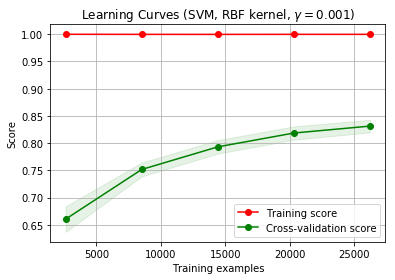

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, scoring=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring=scoring, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.01)
#plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)
#estimator = LogisticRegression(C=1)
estimator = RandomForestClassifier()

def scoring(estimator, X, y):
    y_pred = estimator.predict_proba(X)
    return roc_auc_score(y, y_pred[:, 1])
   
plot_learning_curve(estimator, title, X_train_ohe, y_train, 
                    scoring=scoring, n_jobs=4, cv=5)

plt.show()

In [7]:
clf_rf = RandomForestClassifier()

In [14]:
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

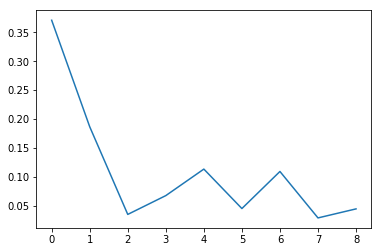

In [15]:
from matplotlib import pyplot as plt

plt.plot(clf_rf.feature_importances_)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [158]:
roc_auc_score

<function sklearn.metrics.ranking.roc_auc_score>

In [16]:
train.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [95]:

feature_importances = pd.DataFrame(clf_rf.feature_importances_.reshape(1, -1), 
                                   index=['feature_importance'], 
                                   columns=train.columns[1:])



In [96]:
feature_importances = feature_importances.T.sort_values(by=['feature_importance'], ascending=False).T

In [97]:
feature_importances

,RESOURCE,MGR_ID,ROLE_DEPTNAME,ROLE_FAMILY_DESC,ROLE_ROLLUP_2,ROLE_TITLE,ROLE_CODE,ROLE_ROLLUP_1,ROLE_FAMILY
feature_importance,0.370993,0.186589,0.113241,0.109111,0.067331,0.04493,0.044336,0.03477,0.028699


In [84]:
sns.barplot?

In [70]:
import seaborn as sns

In [102]:
g = sns.barplot(data=feature_importances,
            color="b")
g.set_xticklabels(feature_importances.columns, rotation=90)


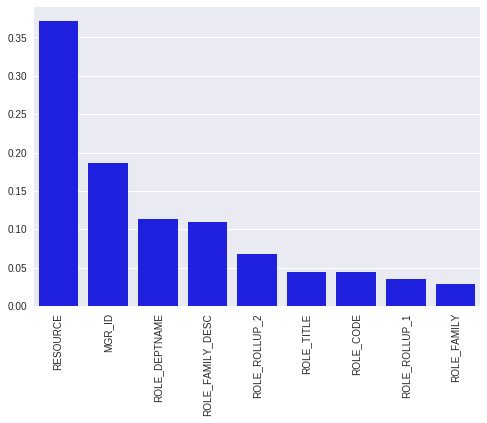

In [103]:
plt.show()

In [22]:
train.columns.shape

(10,)

In [122]:
feature_importances.T > 0.05

,feature_importance
RESOURCE,True
MGR_ID,True
ROLE_DEPTNAME,True
ROLE_FAMILY_DESC,True
ROLE_ROLLUP_2,True
ROLE_TITLE,False
ROLE_CODE,False
ROLE_ROLLUP_1,False
ROLE_FAMILY,False


In [145]:
good_features = feature_importances.columns[feature_importances.loc['feature_importance'] > 0.1]

In [146]:
good_features

Index([u'RESOURCE', u'MGR_ID', u'ROLE_DEPTNAME', u'ROLE_FAMILY_DESC'], dtype='object')

In [147]:
X_train_ohe, y_train, X_test_ohe = prepare_data(features=good_features, target='ACTION')

In [153]:
from sklearn.model_selection import GridSearchCV

logr = LogisticRegression()
gs = GridSearchCV(logr, param_grid={'C' : np.logspace(-1, 1, 10)}, scoring=scoring)
gs.fit(X_train_ohe, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  0.1    ,   0.16681,   0.27826,   0.46416,   0.77426,   1.29155,
         2.15443,   3.59381,   5.99484,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=<function scoring at 0x7f7832a6b500>, verbose=0)

In [155]:
gs.best_estimator_

LogisticRegression(C=2.1544346900318834, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

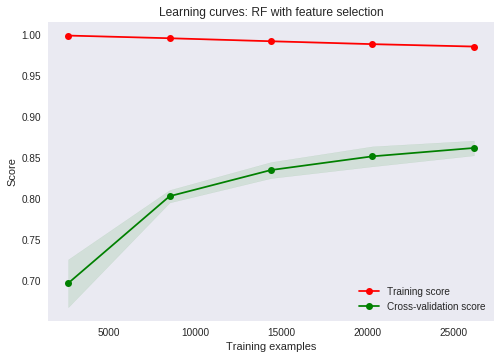

In [156]:
estimator = RandomForestClassifier()
estimator = gs.best_estimator_
title = "Learning curves: RF with feature selection"
plot_learning_curve(estimator, title, X_train_ohe, y_train, 
                    scoring=scoring, n_jobs=4, cv=5)

plt.show()

In [157]:


def group_data(data, degree=3, hash=hash):
    """ 
    numpy.array -> numpy.array
    
    Groups all columns of data into all combinations of triples
    """
    new_data = []
    m,n = data.shape
    for indicies in combinations(range(n), degree):
        new_data.append([hash(tuple(v)) for v in data[:,indicies]])
    return array(new_data).T
